# Sessió 1

In [3]:
def wolfram_rule(rule_number, initial_state, generations):
    """
    Implementació d'un autòmat cel·lular elemental que segueix les regles de Wolfram.

    :param rule_number: El número de regla de Wolfram (entre 0 i 255).
    :param initial_state: L'estat inicial de les cel·les (una llista de 0s i 1s).
    :param generations: El nombre de generacions a evolucionar.
    :return: Una llista que conté les generacions successives de l'autòmat cel·lular.
    """
    
    def apply_rule(state, rule):
        new_state = []
        for i in range(len(state)):
            # Troba els valors dels veïns
            left = state[i - 1]
            center = state[i]
            right = state[(i + 1) % len(state)]  # Tenim en compte el límit circular

            # Calcula el nou valor de la cel·la
            new_value = rule[7 - (left << 2 | center << 1 | right)]
            new_state.append(new_value)
        return new_state

    # Converteix el número de regla en una llista de 0s i 1s
    rule = [int(x) for x in format(rule_number, '08b')]
    state = initial_state
    evolution = [state[:]]  # Llista per desar totes les generacions

    # Aplica la regla per a cada generació
    for _ in range(generations):
        state = apply_rule(state, rule)
        evolution.append(state[:])

    return evolution

# Exemple d'ús
rule_number1 = 30
rule_number2 = 54
initial_state = [0] * 50  # Estat inicial amb 50 cel·les totes a 0
initial_state[25] = 1  # Posicionem una cel·la a 1 a la posició central
generations = 10

evolution = wolfram_rule(rule_number1, initial_state, generations)

# Mostra les generacions
for i, gen in enumerate(evolution):
    print(f"Generació {i}: {''.join(map(str, gen))}")


Generació 0: 00000000000000000000000001000000000000000000000000
Generació 1: 00000000000000000000000011100000000000000000000000
Generació 2: 00000000000000000000000110010000000000000000000000
Generació 3: 00000000000000000000001101111000000000000000000000
Generació 4: 00000000000000000000011001000100000000000000000000
Generació 5: 00000000000000000000110111101110000000000000000000
Generació 6: 00000000000000000001100100001001000000000000000000
Generació 7: 00000000000000000011011110011111100000000000000000
Generació 8: 00000000000000000110010001110000010000000000000000
Generació 9: 00000000000000001101111011001000111000000000000000
Generació 10: 00000000000000011001000010111101100100000000000000


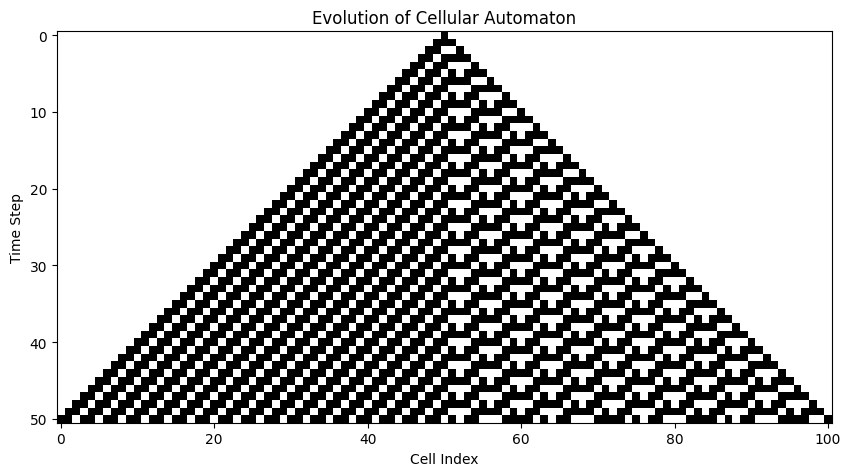

In [7]:
import matplotlib.pyplot as plt

def apply_wolfram_rule(rule_binary, current_row, width):
    new_row = []

    for i in range(width):
        left = current_row[(i-1) % width]
        center = current_row[i]
        right = current_row[(i+1) % width]
        index = int(f'{left}{center}{right}', 2)
        new_row.append(int(rule_binary[7 - index]))

    return new_row

def combine_rows(rows):
    combined_row = []
    for cell_states in zip(*rows):
        combined_cell = 0
        for state in cell_states:
            combined_cell |= state
        combined_row.append(combined_cell)
    return combined_row

def multicellular_wolfram(rules, steps, width):
    initial_row = [0] * width
    initial_row[width // 2] = 1
    grid = [initial_row]

    for _ in range(steps):
        current_row = grid[-1]
        new_rows = []

        for rule_binary in rules:
            new_rows.append(apply_wolfram_rule(rule_binary, current_row, width))

        combined_row = combine_rows(new_rows)
        grid.append(combined_row)

    return grid

def plot_evolution(grid):
    plt.figure(figsize=(10, 6))
    plt.imshow(grid, cmap='Greys', interpolation='nearest')
    plt.title('Evolution of Cellular Automaton')
    plt.xlabel('Cell Index')
    plt.ylabel('Time Step')
    plt.show()

# Example usage
rules = ['00011110','00101110']  # Wolfram rule numbers 30, 46, 54
steps = 50
width = 101

grid = multicellular_wolfram(rules, steps, width)
plot_evolution(grid)